In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

# Gradient Descent

## Introduction
##### The methods for finding the maximum and minimum (extrema) of function have been created with developing of mathematical analysis.Gradient descent is numerical approach to find extrema of function which is enough optimized and it is very used especially in machine learning.The algorithm is very simple and very convenient in case when the function has only one extremum,when the function has many local extrema the task become more difficult which can be solved by manipulationg the increase x step or so called 'learning rate'

## Abstract 
This notebook will make an attempt to explain what is gradient descent,by the most simple explanation as it is possible,if one has not an elementary intuition what is the function and what is the derivative,for him  will be impossible to understand what is the gradient descent and what is the root of machine learning as well

## Methods 
##### At first  we going to investigate most simple quadratic function $y=x^2$
##### where its derivate is $y'=2*x$

In [122]:
#### SOME IMPORT FUNCTION FOR PLOTING AND CALCULATING DERIVATE

def plot_function(x_args,y_args,show=True,label='',x_label='',y_label=''): 
    """
    """
    plt.plot(x_args,y_args,label=label)
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if show:
        plt.show()

def plot_function_f(f,show=True,label='',x_label='',y_label='',x_range=20,y_range=-20): 
    """
    """
    x = np.linspace(-x_range,x_range)
    y = [f(i) for i in x]
    plt.plot(x,y,label=label)
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if show:
        plt.show()        


def plt_properties():
    ax = plt.gca()
    plt.xlim(-10, 10)
    plt.ylim(-10, 100)

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    der = (function(point + precision) - function(point)) / precision
    return der

def plot_derivative_at_point(function, point, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function in the range [x_min; x_max]. Computes the tangent line to the function
    at the given point and also plots it
    """
    plt_properties()
    vectorized_function = np.vectorize(function)

    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)

    slope = 0  # Slope of the tangent line
    if derivative is None:
        slope = calculate_derivative_at_point(function, point)
    else:
        slope = derivative(point)

    intercept = function(point) - slope * point
    tangent_line_x = np.linspace(point - 4.5, point + 4.5, 10)
    tangent_line_y = slope * tangent_line_x + intercept
    plt.plot(x, y)
    plt.plot(tangent_line_x, tangent_line_y,color='r')        
    
    
def plot3D(f,label=''):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(-50,50)
    y = np.linspace(-50,50)
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)  
    #.plot3D(X, Y, Z, 'gray')      
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('a',fontsize=25)
    ax.set_ylabel('b',fontsize=25)
    ax.set_zlabel('cost',fontsize=25)
    plt.legend()

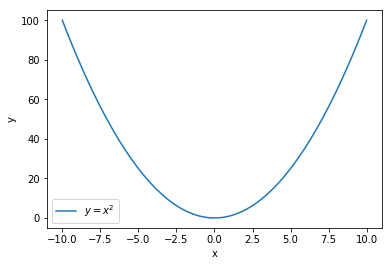

In [99]:
y = lambda x : x**2
x_args = np.linspace(-10,10)
y_args = y(x_args)
plot_function(x_args,y_args,label="$y=x^2$",x_label='x',y_label='y')

##### The above graphic immediatly shows  the min value of y  is  when  x = 0, but we have to make an algorithm wich is able to find numericaly x value ,especialy in more sophisticated functions which contains  many variables. 




#### When we give the different values on x by function f(x) y  takes different values.Our goal is to give such values on x that y to tends to its min value using only the derivate  y' or in many variable the gradient of y 

##### OK! We have f(x)=y=$x^2$ its derivate is 2^x if you have learn matematical analysis maybe you know about the Rolle's theorem ,you can read https://www.math24.net/rolles-theorem/.
#### Let's to dive in gradient descent
### !!!! Remember that we not interested in what is the minimum value   of y the  purpose is to find the value x where y gain its  min

lets to give random variable for x ,for example -9
then we have f(-9) = 81,here we have to make a choice what  the increase  step  'h' must to be around  -9  to achieve  f(-9+h)<f(-9)
let h=0.1 then we have $\frac{y(-9+0.1) - f(-9)}{0.1}<0$ we can give for h = some positive number 0.1 or 0.5 and  y will decrease
,if we give h =-0.1 we get $\frac{y(-9-0.1) - f(-9)}{0.1}>0$ this meean y increase .For above discusion we can undestand that the h must to positive in case $\frac{y(-9+h) - f(-9)}{h}<0$ also $\frac{y(-9+h) - f(-9)}{h}=f'(9) + O(h) <0$  this brings us to idea ,the h must to be with oposite sign of derivate ,we can see with x=9 the we have $\frac{y(9+h) - f(9)}{0.1}>0$ and f'(9)=18 ,We see that if we get h with sign opposite of first derivate the function decreace this can be proof with Tailor'series 

The conclusion is of we want to y tends min then x = x - f('x')

In [24]:
def perform_gradien_descent(gradient,init_x=-10,learning_step=0.1,count_iteration=1000):
    x = init_x
    for i in range(count_iteration):
        x = x - gradient(x)*learning_step
        #print(x)
        
    return math.ceil(x)

In [29]:
f_prim = lambda x :x*2
result = perform_gradien_descent(f_prim,-3,count_iteration=400)
result = perform_gradien_descent(f_prim)
print('min value is when x = ',math.ceil(result))

min value is when x =  0


### we can see that the result tends to zero if we get the last number this will be our x for wich y gets min value 

### let's to see for the function $f(x) = x^2 -4*x -10$
#### f'(x)=2*x -4 analiticaly from Role's theorem we can calculate that when x = 2 y = -10 ant -10 is the minimum of function
##### let's to apply gradient descent 

No handles with labels found to put in legend.


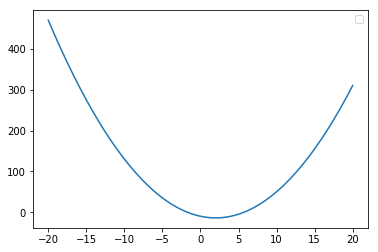

min value is when x =  2


In [102]:
f = lambda x : x**2 - 4*x -10
plot_function_f(f)
f_prim = lambda x : x*2 - 4
result = perform_gradien_descent(f_prim)
print('min value is when x = ',math.ceil(result))

##### the red line shows tangent or first derivate tg of angle between this  with x axis show if the function increase or decrease

### this algoritims can be apply for the function of many variable

In [111]:
def perform_gradien_desent(gradient_x,gradient_y,init_x=-10,init_y=-10,learning_step=0.1,count_iteration=1000):
    x = init_x
    y= init_y
    for i in range(count_iteration):
        new_x = x - gradient_x(x,y)*learning_step
        new_y = y - gradient_y(x,y)*learning_step
        x = new_x
        y = new_y
    
    print('(x,y)=', math.ceil(x),math.ceil(y) )
    return math.ceil(x),math.ceil(y)  


            

$$f(x,y) = x^2 + y^2 -x*y $$
$$\frac{\partial{f}}{\partial{x}} = 2*x -y $$
$$\frac{\partial{f}}{\partial{y}} = 3*y -x $$


No handles with labels found to put in legend.


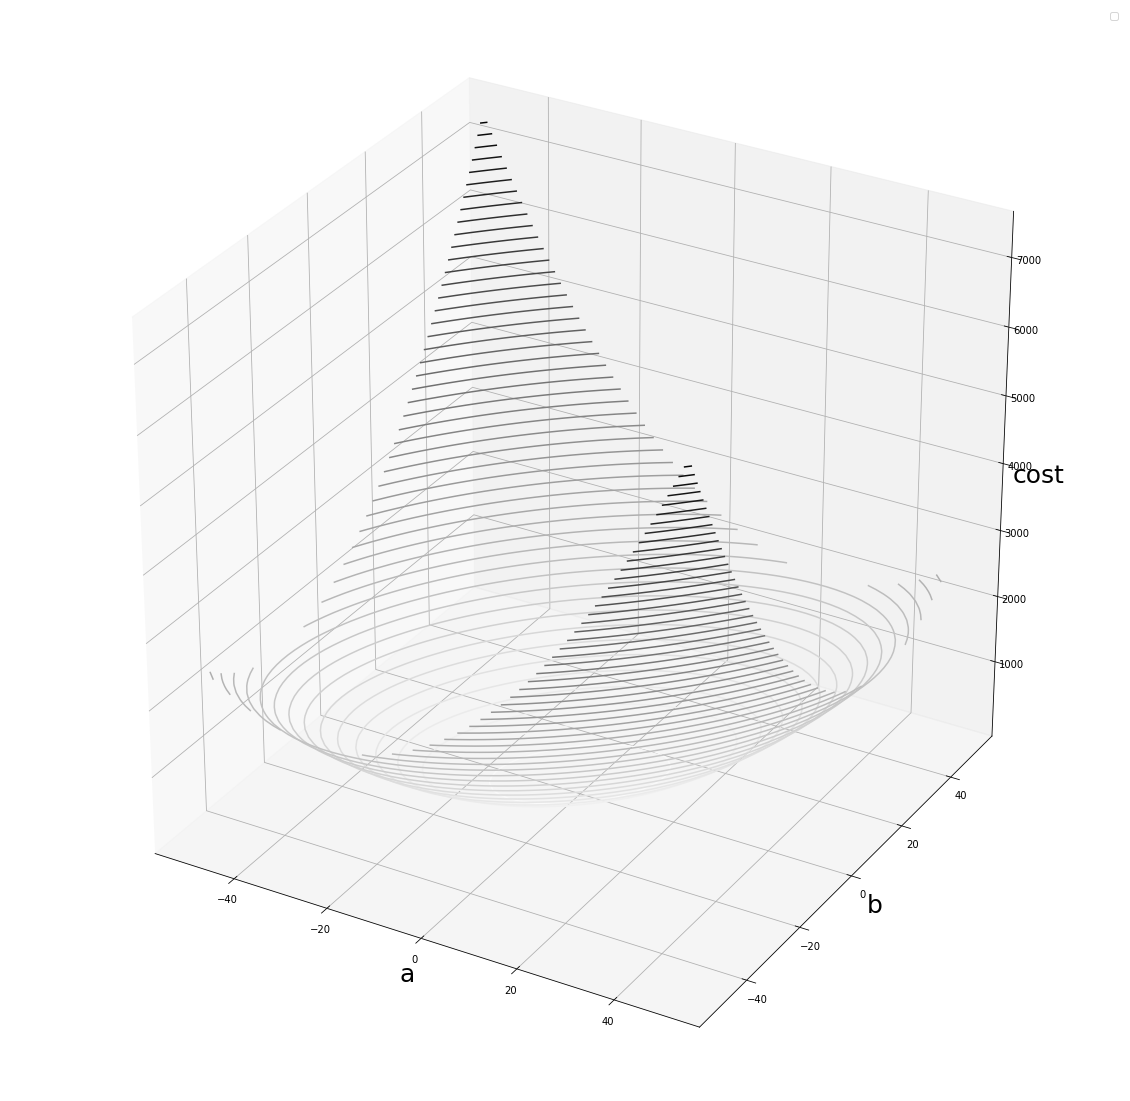

In [123]:
f = lambda x,y : x**2 + y**2 -x*y
#f = lambda x,y : x**2 + y**2
plot3D(f)

In [113]:

gradient_x = lambda x,y : 2*x -y
gradient_y = lambda x,y : 2*y - x

result = perform_gradien_desent(gradient_x,gradient_y)


(x,y)= 0 0


$$f(x,y) = (x-y)^2 - 5*y*x $$
$$\frac{\partial{f}}{\partial{x}} = 2*(x-y) -5*y $$
$$\frac{\partial{f}}{\partial{y}} = 2*(x-y) -5*x$$


No handles with labels found to put in legend.


(x,y)= 0 0


(0, 0)

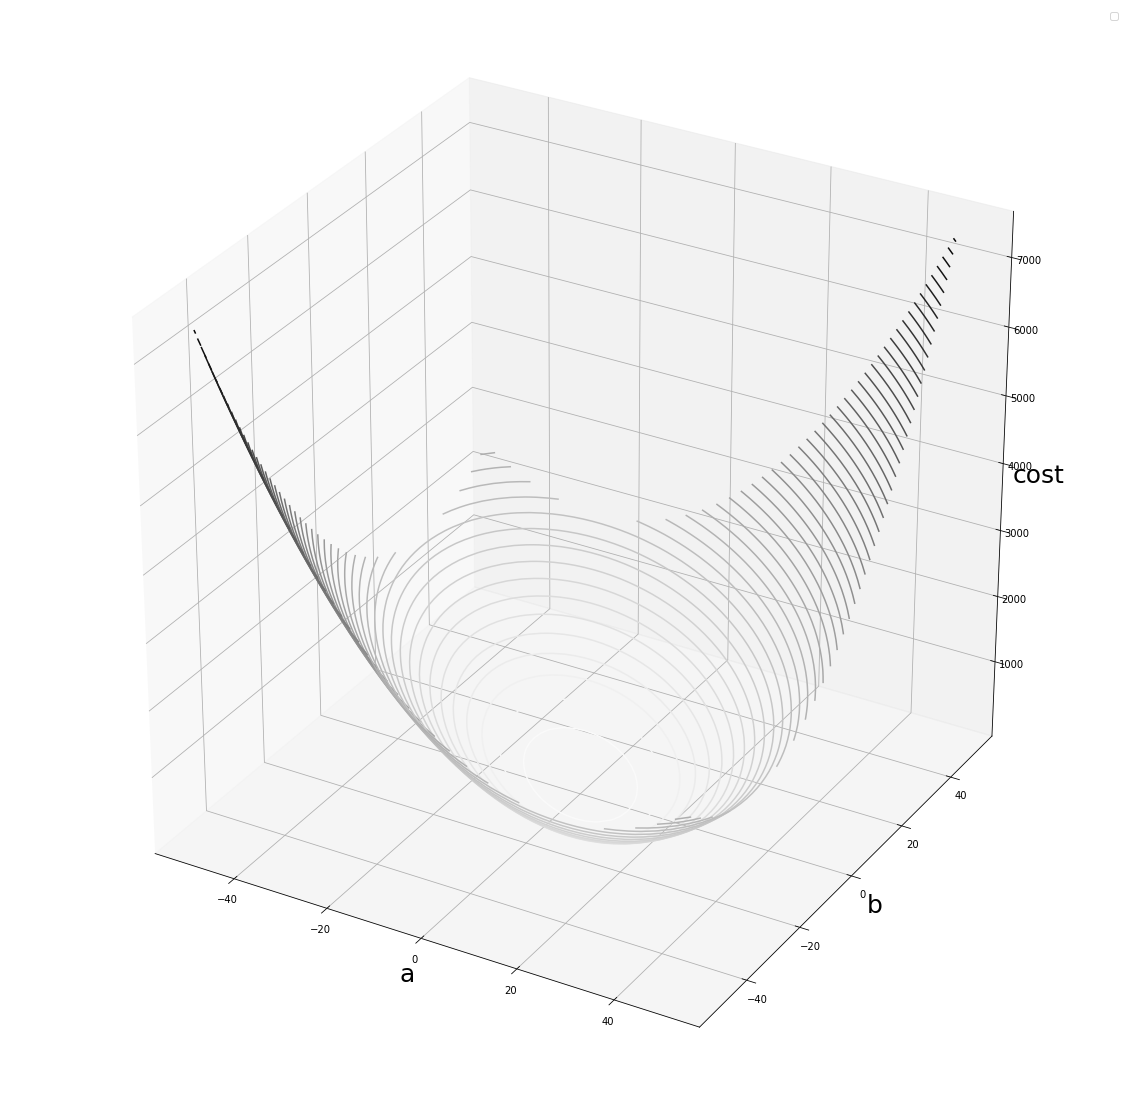

In [127]:
f = lambda x,y : (x+y)**2 -x*y
plot3D(f)
gradient_x = lambda x,y : 2*(x+y) -y
gradient_y = lambda x,y : 2*(x+y) -x 

perform_gradien_desent(gradient_x,gradient_y)

$$f(x,y) = (x + y)^2 -10*x*y$$
$$\frac{\partial{f}}{\partial{x}} = 2*(x+y) -10*y $$
$$\frac{\partial{f}}{\partial{y}} = 2*(y+x) -10*x $$


No handles with labels found to put in legend.


(x,y)= 4 3


(4, 3)

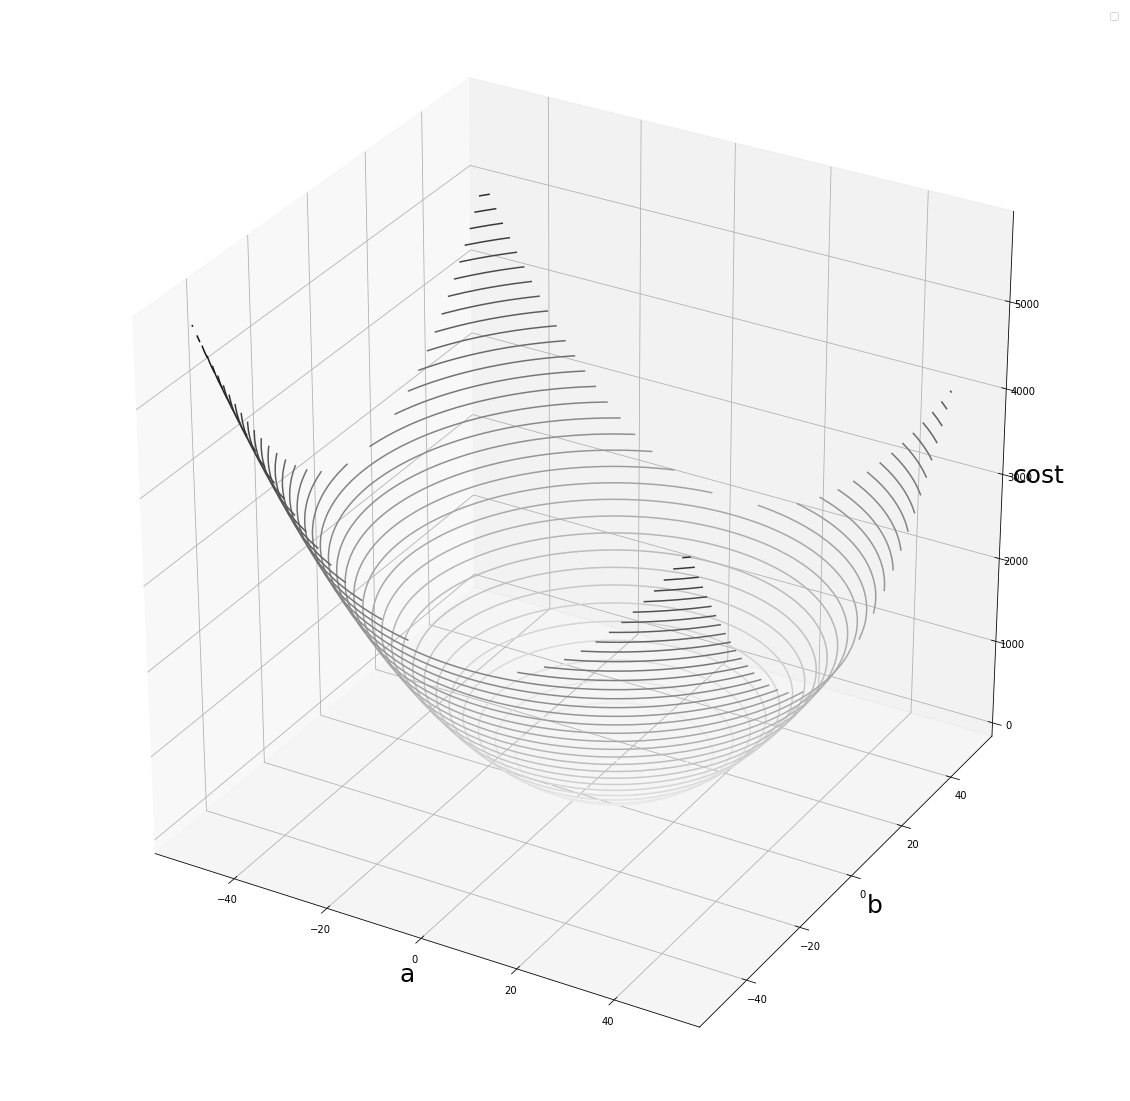

In [132]:
f = lambda x,y : +x**2 + y**2 -10*x -8*y
plot3D(f)
gradient_x = lambda x,y : 2**x -10
gradient_y = lambda x,y : 2**y - 8

perform_gradien_desent(gradient_x,gradient_y)